<h1 style="color: red">Projet Python ING3 APP - Game of Life</h1>

## Sommaire
# 1. Description générale
# 2. Cahier des charges
# 3. Partie Moteur de Jeu
# 4. Partie Interface
# 5. Partie Sauvegarde et Chargement
# 6. Partie Optimisation
# 7. Partie Présentation et Analyse de données
# 8. Conclusion


# 1.Description générale

## Une création de John Conway

> Le Jeu de la Vie est un automate cellulaire qui repose sur des règles simples mais produit des dynamiques complexes.
> Inventé en 1970, il illustre comment des comportements imprévisibles peuvent émerger à partir de règles déterministes.
## Regles du jeu de la vie:
<ul>
<li style="font-size: 20px">Survie : Une cellule vivante reste en vie avec 2 ou 3 voisins vivants.
<li style="font-size: 20px">Mort : Une cellule vivante meurt si elle a moins de 2 ou plus de 3 voisins vivants.
<li style="font-size: 20px">Naissance : Une cellule morte devient vivante avec exactement 3 voisins vivants.
</ul>

### Exemples de structures célèbres :

<table>
  <tr>
    <th>Type</th>
    <th>Description</th>
    <th>Illustration</th>
  </tr>
  <tr>
    <td><strong>Still Life</strong></td>
    <td>Formes constantes</td>
    <td><img src="Image/Constant.gif" alt="Still Life"></td>
  </tr>
  <tr>
    <td><strong>Oscillateurs</strong></td>
    <td>Structures qui oscillent périodiquement</td>
    <td><img src="Image/Oscillator.gif" alt="Oscillator"></td>
  </tr>
  <tr>
    <td><strong>Gliders</strong></td>
    <td>Structures qui se déplacent</td>
    <td><img src="Image/GliderTot.gif" alt="Glider" ></td>
  </tr>
  <tr>
    <td><strong>GunGliders</strong></td>
    <td>Structures qui se déplacent et qui créent</td>
    <td><img src="Image/GunGlider.gif" alt="GunGlider" ></td>
  </tr>
</table>




<h1>2. Cahier des charges</h1>

<h2>Objectif du Projet</h2>
<p>Ce projet vise à développer une application Python qui :</p>
<ul>
  <li>Simule le Jeu de la Vie avec une interface interactive.</li>
  <li>Analyse l’évolution des cellules au fil du temps.</li>
  <li>Présente des résultats visuels et statistiques sur le comportement du système.</li>
</ul>

---

<h2>Structure du Projet</h2>

<h3>1. Moteur de Jeu</h3>
<div class="highlight">
  <ul>
    <li>Implémentation des règles du Jeu de la Vie.</li>
    <li>Gestion d’une grille dynamique de cellules (vivantes ou mortes).</li>
    <li>Initialisation aléatoire de la grille et personnalisation des règles.</li>
  </ul>
</div>

<h3>2. Interface Utilisateur</h3>
<div class="highlight">
  <ul>
    <li>Création d’une interface interactive pour visualiser et contrôler la grille.</li>
    <li>Support de fonctionnalités comme zoom, déplacement et placement de structures complexes.</li>
  </ul>
</div>

<h3>3. Sauvegarde et Chargement</h3>
<div class="highlight">
<ul>
<li>Sauvegarde et chargement de la grille pour permettre une reprise ultérieure.</li>
<li>Exportation de la grille sous forme d’image ou de fichier texte.</li>

</ul>
</div>

<h3>4. Optimisation</h3>
<div class="highlight">
<ul>
<li>Optimisation des performances pour gérer des grilles de grande taille.</li>
<li>Utilisation de techniques de calcul parallèle pour accélérer le traitement.</li>
</ul>
</div>

<h3>5. Analyse et Visualisation des Données</h3>
<div class="highlight">
<ul>
  <li>Étude du nombre de cellules vivantes dans le temps.</li>
  <li>Traçage de graphiques pour observer l’évolution et analyser les structures complexes.</li>
</ul>
</div>






<h1>3. Partie Moteur de Jeu</h1>
<Importer l'image>
<li>Algorigramme de la partie Moteur de jeu :</li>
<br>
<img src="Image/GameOfLifeFlowchart.png" alt="John Conway" style="height:auto ;width: 100%"/>
<li>Exemple de code pour calculer les voisins vivants :</li>


In [1]:
# Importation des bibliothèques nécessaires
import numpy as np
from scipy.signal import convolve2d

# Define patterns for usual figures
GLIDER_PATTERN = np.array([[0, 1, 0],
                           [0, 0, 1],
                           [1, 1, 1]])

BLINKER_PATTERN = np.array([[1, 1, 1]])

BLOCK_PATTERN = np.array([[1, 1],
                          [1, 1]])

# Classe JeuDeLaVie
class JeuDeLaVie:
    def __init__(self, lignes, colonnes):
        self.grille = np.random.randint(2, size=(lignes, colonnes))
        self.nb1_naissance = 3
        self.nb2_naissance = 3
        self.nb_survie = 2

    def evoluer_sans_bordures(self):
        # Définir le noyau pour compter les voisins
        kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
        # Convolution pour compter les voisins
        voisins = convolve2d(self.grille, kernel, mode='same', boundary='wrap')
        # Application des règles
        nouvelle_grille = (
            (self.grille == 1) & ((voisins == self.nb1_naissance) | (voisins == self.nb2_naissance)) |
            (self.grille == 0) & (voisins == self.nb_survie)
        )
        # Mise à jour
        self.grille = nouvelle_grille.astype(int)

# Exemple d'exécution
jeu = JeuDeLaVie(10, 10)
print("Grille initiale:")
print(jeu.grille)
jeu.evoluer_sans_bordures()
print("Grille après évolution:")
print(jeu.grille)


Grille initiale:
[[1 0 1 1 0 0 1 1 1 0]
 [0 0 0 1 1 1 1 1 0 0]
 [0 0 1 0 0 0 1 1 1 1]
 [1 0 1 1 1 0 1 0 1 0]
 [1 1 0 0 0 0 1 0 0 1]
 [1 0 1 1 0 1 1 1 0 1]
 [1 0 1 0 0 0 1 1 1 0]
 [1 0 0 0 1 0 0 1 1 0]
 [0 0 0 1 0 1 1 1 0 1]
 [1 0 0 1 0 1 0 0 0 0]]
Grille après évolution:
[[0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 1]
 [0 0 1 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 1 0 1 0 1]
 [0 0 0 1 0 1 0 0 0 0]]


<h1>4. Partie Interface</h1>
<Importer l'image>
<li>Algorigramme de la partie Interface :</li>
<br>
<img src="Image/AlgoInterface.png" alt="John Conway" style="height:90% ;width: 90%"/>
<li>Code pour afficher la grille :</li>

In [11]:
import numpy as np
import pygame
import math
from Grille import Grille

def dessiner_grille(self, grille, Fenetre_util, Moteur_util):
        n_lignes, n_colonnes = grille.grille.shape

        # Créer une grille de rectangles
        x_coords, y_coords = np.meshgrid(np.arange(n_colonnes), np.arange(n_lignes))
        x_coords = (x_coords - Moteur_util.scroll_x) * Fenetre_util.taille_case + Fenetre_util.taille_statistiques
        y_coords = (y_coords - Moteur_util.scroll_y) * Fenetre_util.taille_case

        int_x_coords = x_coords
        int_y_coords = y_coords

        # Filtrer les cellules en dehors de l'écran
        mask = (int_x_coords >= Fenetre_util.taille_statistiques) & (int_x_coords < self.fenetre.get_width())
        mask &= (int_y_coords >= 0) & (int_y_coords < self.fenetre.get_height())
        int_x_coords = int_x_coords[mask]
        int_y_coords = int_y_coords[mask]

        caclCoordHG = ((int_x_coords[
                            0] - Fenetre_util.taille_statistiques) // Fenetre_util.taille_case) + Moteur_util.scroll_x, (
                                  int_y_coords[0] // Fenetre_util.taille_case) + Moteur_util.scroll_y
        caclCoordBD = ((int_x_coords[
                            -1] - Fenetre_util.taille_statistiques) // Fenetre_util.taille_case) + Moteur_util.scroll_x, (
                                  int_y_coords[-1] // Fenetre_util.taille_case) + Moteur_util.scroll_y

        # Premier point de la grille
        Moteur_util.coordHG = caclCoordHG

        # Derneir point de la grille
        Moteur_util.coordBD = caclCoordBD

        # Filtrer les cellules vivantes
        vivant_mask = grille.grille == 1
        vivant_x_coords = x_coords[vivant_mask]
        vivant_y_coords = y_coords[vivant_mask]

        mask1 = (vivant_x_coords >= Fenetre_util.taille_statistiques) & (vivant_x_coords < self.fenetre.get_width())
        mask1 &= (vivant_y_coords >= 0) & (vivant_y_coords < self.fenetre.get_height())
        dessin_x_coords = vivant_x_coords[mask1]
        dessin_y_coords = vivant_y_coords[mask1]

        # Dessiner les cellules mortes en arrière-plan
        rect = pygame.Rect(Fenetre_util.taille_statistiques, 0, self.fenetre.get_width(), self.fenetre.get_height())
        pygame.draw.rect(self.fenetre, Fenetre_util.couleur_mort, rect)

        # Créer une surface temporaire pour les cellules vivantes
        temp_surface = pygame.Surface((self.fenetre.get_width(), self.fenetre.get_height()), pygame.SRCALPHA)
        temp_surface.fill((0, 0, 0, 0))  # Remplir avec une transparence totale

        # Dessiner les cellules vivantes sur la surface temporaire
        for x, y in zip(dessin_x_coords, dessin_y_coords):
            rect = pygame.Rect(x, y, Fenetre_util.taille_case, Fenetre_util.taille_case)
            pygame.draw.rect(temp_surface, Fenetre_util.couleur_vivant, rect)

        # Blit la surface temporaire sur la fenêtre principale
        self.fenetre.blit(temp_surface, (0, 0))

        # Dessiner les lignes de grille si nécessaire
        if Moteur_util.Bool_grille:
            # Dessiner les lignes horizontales
            for y in range(n_lignes + 1):
                start_pos = (Fenetre_util.taille_statistiques, y * Fenetre_util.taille_case)
                end_pos = (
                Fenetre_util.taille_statistiques + n_colonnes * Fenetre_util.taille_case, y * Fenetre_util.taille_case)
                pygame.draw.line(self.fenetre, (128, 128, 128), start_pos, end_pos)

            # Dessiner les lignes verticales
            for x in range(n_colonnes + 1):
                start_pos = (Fenetre_util.taille_statistiques + x * Fenetre_util.taille_case, 0)
                end_pos = (
                Fenetre_util.taille_statistiques + x * Fenetre_util.taille_case, n_lignes * Fenetre_util.taille_case)
                pygame.draw.line(self.fenetre, (128, 128, 128), start_pos, end_pos)


TypeError: dessiner_grille() missing 3 required positional arguments: 'grille', 'Fenetre_util', and 'Moteur_util'

<h1>5. Partie Sauvegarde et Chargement</h1>
<li>Image de la page des sauvegardes :</li>
<br>
<img src="Image/photoSauv.png" alt="John Conway" style="height:30% ;width: 30%"/>
<li>Code pour sauvegarder et charger une grille :</li>

In [ ]:
# Sauvegarde et chargement
import numpy as np

def sauvegarder_grille(grille, nom_fichier):
    np.savez_compressed(nom_fichier, grille=grille)
    print(f"Grille sauvegardée dans {nom_fichier}.npz")

def charger_grille(nom_fichier):
    with np.load(f"{nom_fichier}.npz") as data:
        grille = data['grille']
    print("Grille chargée:")
    print(grille)
    return grille

# Test des fonctions
nom_fichier = "grille_sauvegardee"

# Sauvegarde de la grille
sauvegarder_grille(jeu.grille, nom_fichier)
print(f"Fichier '{nom_fichier}.npz' sauvegardé avec succès.")

# Chargement de la grille
nouvelle_grille = charger_grille(nom_fichier)
print(f"Fichier '{nom_fichier}.npz' chargé avec succès.")


Grille sauvegardée dans grille_sauvegardee.npz
Fichier 'grille_sauvegardee.npz' sauvegardé avec succès.
Grille chargée:
[[0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 1]
 [0 0 1 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 1 0 1 0 1]
 [0 0 0 1 0 1 0 0 0 0]]
Fichier 'grille_sauvegardee.npz' chargé avec succès.


<h1>6. Partie Optimisation</h1>
<Importer l'image>
<li>Voici le code qui permet d'optimiser le traitement pour les grilles de grandes tailles :</li>


In [ ]:
# Créer une surface temporaire pour les cellules vivantes
temp_surface = pygame.Surface((self.fenetre.get_width(), self.fenetre.get_height()), pygame.SRCALPHA)
temp_surface.fill((0, 0, 0, 0))  # Remplir avec une transparence totale

# Dessiner les cellules vivantes sur la surface temporaire
vivant_rects = [pygame.Rect(x, y, Fenetre_util.taille_case, Fenetre_util.taille_case) for x, y in zip(dessin_x_coords, dessin_y_coords)]
pygame.draw.rect(temp_surface, Fenetre_util.couleur_vivant, vivant_rects)

# Blit la surface temporaire sur la fenêtre principale
self.fenetre.blit(temp_surface, (0, 0))


In [ ]:
# Créer une surface de grille
grid_surface = pygame.Surface((n_colonnes * Fenetre_util.taille_case, n_lignes * Fenetre_util.taille_case))
grid_surface.fill((0, 0, 0))  # Remplir la grille avec une couleur de fond

# Dessiner les lignes de la grille
for y in range(n_lignes + 1):
    start_pos = (Fenetre_util.taille_statistiques, y * Fenetre_util.taille_case)
    end_pos = (Fenetre_util.taille_statistiques + n_colonnes * Fenetre_util.taille_case, y * Fenetre_util.taille_case)
    pygame.draw.line(grid_surface, (128, 128, 128), start_pos, end_pos)

for x in range(n_colonnes + 1):
    start_pos = (Fenetre_util.taille_statistiques + x * Fenetre_util.taille_case, 0)
    end_pos = (Fenetre_util.taille_statistiques + x * Fenetre_util.taille_case, n_lignes * Fenetre_util.taille_case)
    pygame.draw.line(grid_surface, (128, 128, 128), start_pos, end_pos)

# Blit la surface de la grille sur la fenêtre principale
self.fenetre.blit(grid_surface, (0, 0))


<h1>7. Partie Présentation et Analyse de données</h1>
<Importer l'image>
<li>Exemple de courbe représentant l'évolution des cellules vivantes et mortes au cours du temps :</li>
<br>
<img src="Image/statGraph.png"  style="height:90% ;width: 90%"/>
<li>Fonction pour analyser l'évolution de la grille :</li>

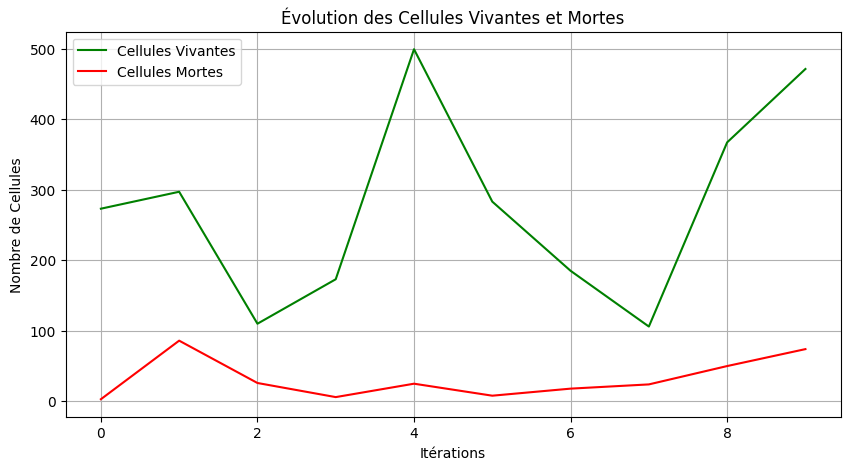

In [ ]:
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import shutil

class Analyse:
    def __init__(self):
        pass
 # Fonction pour analyser l'évolution de la grille
    def analyser_evolution(self,grille_initiale, grille_finale):
        changement = np.sum(grille_initiale != grille_finale)
        return changement
 # Fonction pour stocker les statistiques des cellules vivantes et mortes à chaque itération dans un fichier CSV
    def stocker_statistiques_csv(self,n_vivants, n_morts, iteration, nom_fichier='statistiques.csv'):
        existe = os.path.exists(nom_fichier)
        with open(nom_fichier, mode='a', newline='') as file:
            writer = csv.writer(file)
            if not existe:
                writer.writerow(['Iteration', 'Vivants', 'Morts'])  # Écrire l'en-tête si le fichier n'existe pas
            writer.writerow([iteration, n_vivants, n_morts])

    # Fonction pour charger les statistiques depuis un fichier CSV
    def charger_statistiques_csv(self, chemin_fichier='statistiques.csv'):
        statistiques = []
        if os.path.exists(chemin_fichier):
            with open(chemin_fichier, mode='r') as file:
                reader = csv.DictReader(file)
                for row in reader:
                    statistiques.append(row)
        return statistiques

    # Fonction pour afficher les statistiques sous forme de courbe
    def afficher_courbe_statistiques(self,statistiques):
        iterations = [int(stat['Iteration']) for stat in statistiques]
        vivants = [int(stat['Vivants']) for stat in statistiques]
        morts = [int(stat['Morts']) for stat in statistiques]

        plt.figure(figsize=(10, 5))
        plt.plot(iterations, vivants, label='Cellules Vivantes', color='green')
        plt.plot(iterations, morts, label='Cellules Mortes', color='red')
        plt.xlabel('Itérations')
        plt.ylabel('Nombre de Cellules')
        plt.title('Évolution des Cellules Vivantes et Mortes')
        plt.legend()
        plt.grid(True)
        plt.show()

analyse = Analyse()
# Simulation d'un exemple d'évolution
n_iterations = 10
for iteration in range(n_iterations):
    n_vivants = np.random.randint(100, 500)  # Nombre de cellules vivantes aléatoire
    n_morts = np.random.randint(0, 100)     # Nombre de cellules mortes aléatoire
    
    analyse.stocker_statistiques_csv(n_vivants, n_morts, iteration)

# Charger les statistiques depuis le fichier CSV
statistiques = analyse.charger_statistiques_csv()

# Afficher la courbe des statistiques
analyse.afficher_courbe_statistiques(statistiques)

<h1>8. Conclusion</h1>
<h3>Fonctionnalités présentes et fonctionnelles dans notre jeu de la vie :</h3>
<li>Toutes les fonctionnalités demandées dans le cahier des charges sont présentes et bien implémentées</li>
<h3>Compétences et notions dévelopées durant le projet du jeu de la vie :</h3>
<ul>
<li>Utilisation et apprentissage de la librairie graphique Pygame</li>
<li>Comprendre et mettre en place certains concepts mathématiques et algorithmiques tels que la convolution, l'automatisation cellulaire, la logique conditionelle etc...</li>
</ul>